In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("adult.csv")

In [ ]:
df.columns=['age','workclass','fnlwgt','education','education.num','relationship','occupation','marital.status','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,relationship,occupation,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Text(0.5, 1.0, 'Correlation Matrix')

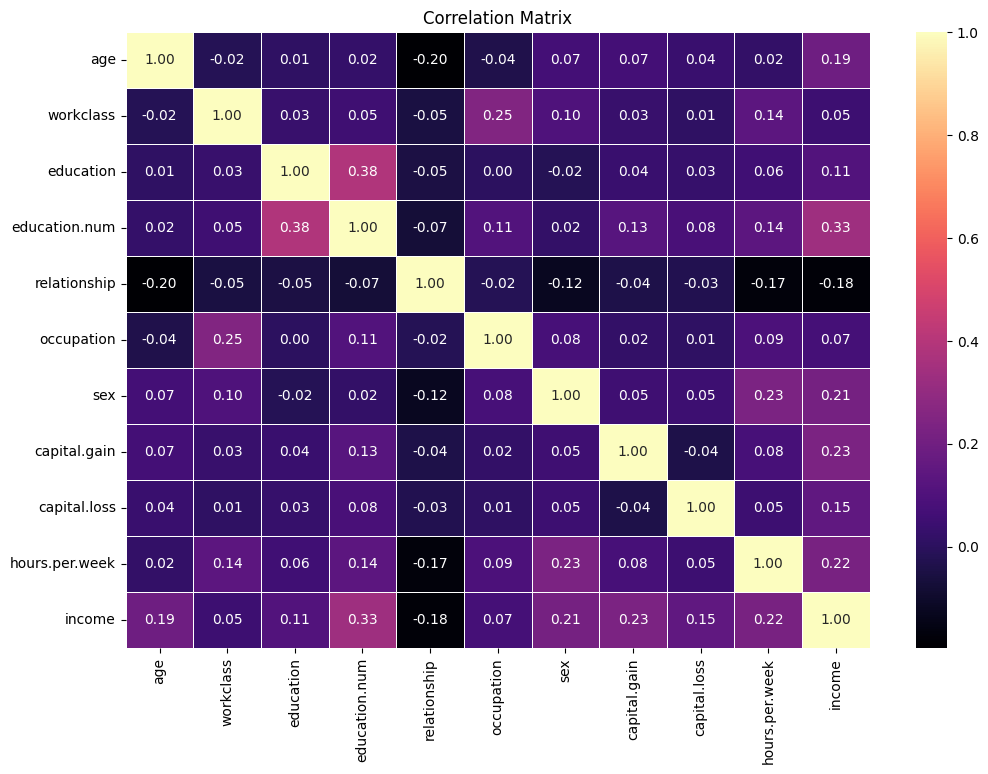

In [ ]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
df.drop(['marital.status', 'race', 'native.country', 'fnlwgt'], axis=1, inplace=True)

In [ ]:
df.head()

,age,workclass,education,education.num,relationship,occupation,sex,capital.gain,capital.loss,hours.per.week,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Female,0,0,40,<=50K


Text(0.5, 1.0, 'Correlation Matrix')

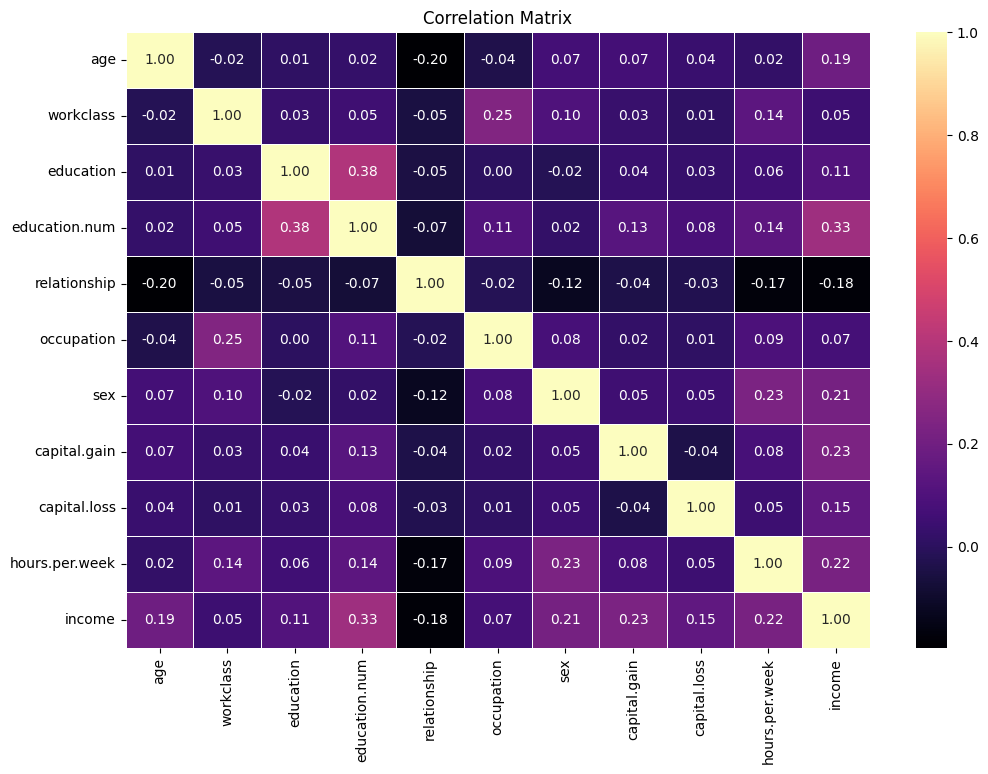

In [ ]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
# Yinelenen verileri kontrol edin
print("Yinelenen satır sayısı:", df.duplicated().sum())

# Yinelenen satırları kaldırın
df.drop_duplicates(inplace=True)

# Temizlendikten sonra yinelenen satır sayısını tekrar kontrol edin
print("Yinelenen satır sayısı (temizlendikten sonra):", df.duplicated().sum())


Yinelenen satır sayısı: 5864
Yinelenen satır sayısı (temizlendikten sonra): 0


In [ ]:
# Veri setinin boyutunu öğrenin
print("Veri setinin boyutu:", df.shape)

# Veri setindeki satır sayısı
print("Satır sayısı:", df.shape[0])

# Veri setindeki sütun sayısı
print("Sütun sayısı:", df.shape[1])


Veri setinin boyutu: (26696, 11)
Satır sayısı: 26696
Sütun sayısı: 11


In [ ]:
# Her değişkenin benzersiz değer sayılarını öğrenin
unique_values = df.nunique()
print(unique_values)


age                73
workclass           9
education          16
education.num      16
relationship        7
occupation         15
sex                 2
capital.gain      119
capital.loss       92
hours.per.week     94
income              2
dtype: int64


In [ ]:
# education ve education.num arasındaki korelasyonu hesaplayın
correlation = df['education'].astype('category').cat.codes.corr(df['education.num'])
print("Korelasyon:", correlation)


Korelasyon: 0.3831201920395993


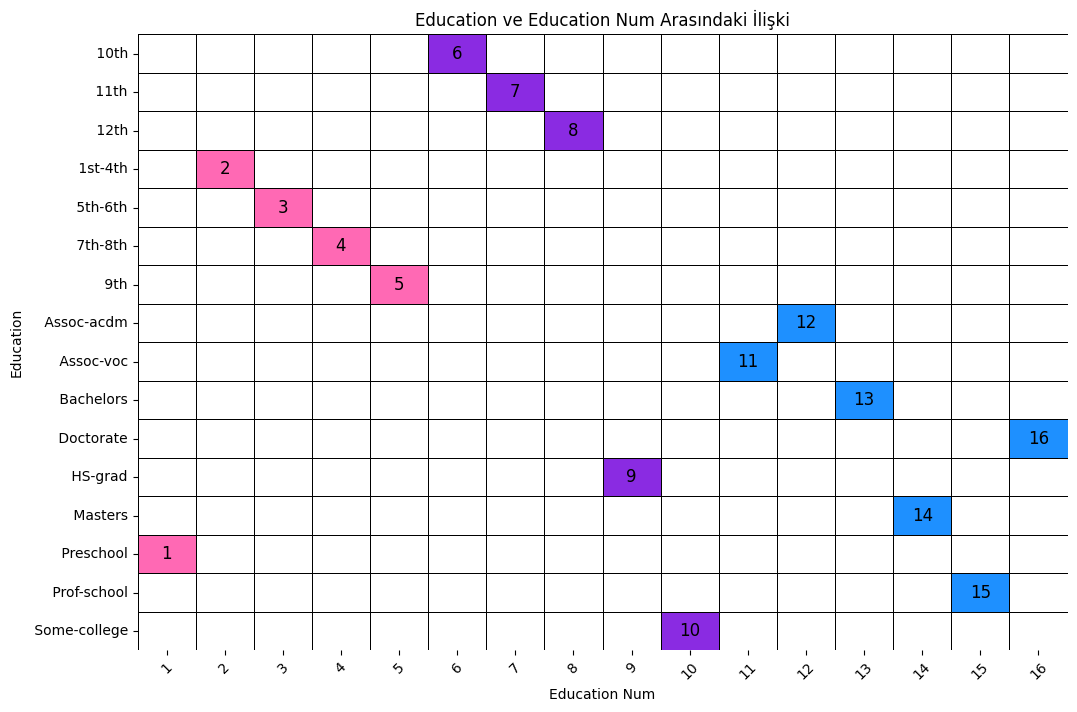

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# education ve education.num sütunlarının benzersiz değerlerini eşleştirme
education_mapping = df[['education', 'education.num']].drop_duplicates().sort_values(by='education.num')

# Bir pivot tablosu oluşturma
pivot_table = education_mapping.pivot(index='education', columns='education.num', values='education.num')

# Özel bir renk paleti oluşturma
cmap = sns.color_palette(["#FF69B4", "#8A2BE2", "#1E90FF"])

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap=cmap, cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12, "color": 'black'})
plt.title('Education ve Education Num Arasındaki İlişki')
plt.xlabel('Education Num')
plt.ylabel('Education')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# Örnek veri seti yükleme (Zaten df'yi yüklediğinizi varsayıyorum)
# df = pd.read_csv('veri_seti.csv')

# '?' değerlerini NaN ile değiştirme
df.replace('?', np.nan, inplace=True)

# Eksik değerleri kontrol etme
print(df.isnull().sum())

# Eksik değerleri doldurma veya çıkarma
# Örneğin, eksik değerleri en sık değerle doldurma
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Temizlenmiş veri setini kontrol etme
print(df.isnull().sum())


age               0
workclass         0
education         0
education.num     0
relationship      0
occupation        0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64
age               0
workclass         0
education         0
education.num     0
relationship      0
occupation        0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64


In [ ]:
# Eksik değer içeren satırları kaldırma
df.dropna(inplace=True)

# Temizlenmiş veri setini kontrol etme
print(df.isnull().sum())
print("Veri setinin yeni boyutu:", df.shape)


age               0
workclass         0
education         0
education.num     0
relationship      0
occupation        0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64
Veri setinin yeni boyutu: (26696, 11)


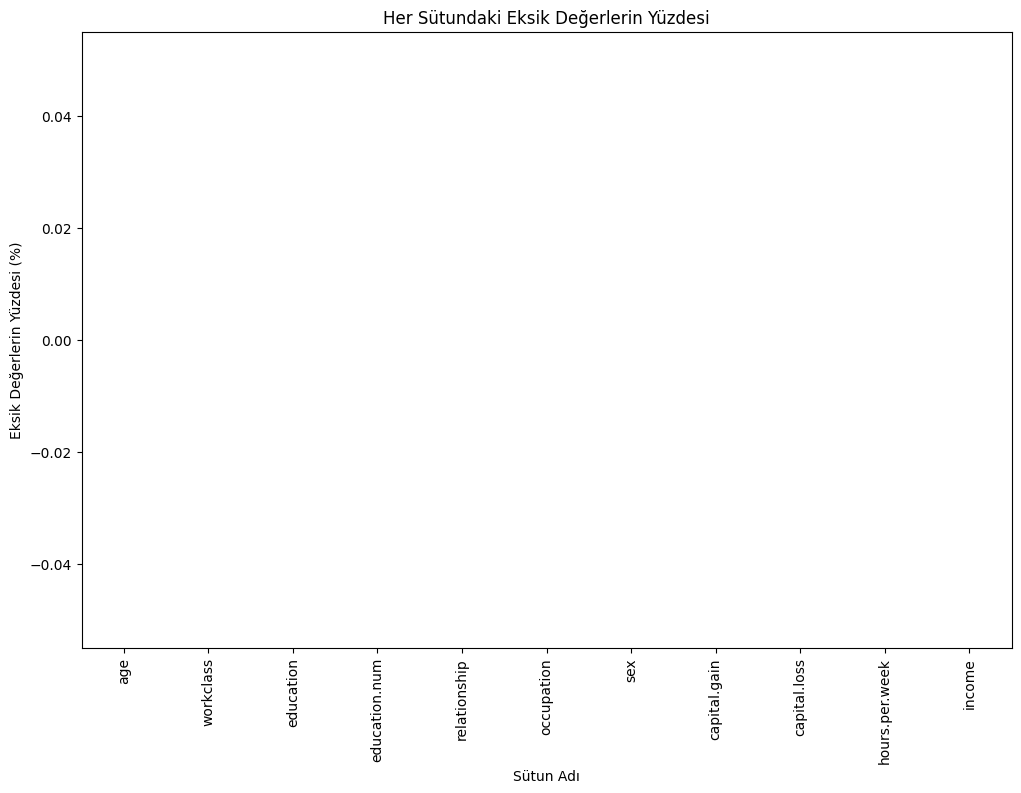

In [ ]:
# Her sütundaki eksik değerlerin yüzdesini hesaplama
missing_percent = df.isnull().mean() * 100

# Eksik değer yüzdesine göre sıralama
missing_percent = missing_percent.sort_values(ascending=False)

# Eksik değer yüzdesi grafiği oluşturma
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.index, y=missing_percent, palette=["#FF69B4", "#8A2BE2", "#1E90FF"])
plt.title('Her Sütundaki Eksik Değerlerin Yüzdesi')
plt.xlabel('Sütun Adı')
plt.ylabel('Eksik Değerlerin Yüzdesi (%)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26696 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26696 non-null  int64 
 1   workclass       26696 non-null  object
 2   education       26696 non-null  object
 3   education.num   26696 non-null  int64 
 4   relationship    26696 non-null  object
 5   occupation      26696 non-null  object
 6   sex             26696 non-null  object
 7   capital.gain    26696 non-null  int64 
 8   capital.loss    26696 non-null  int64 
 9   hours.per.week  26696 non-null  int64 
 10  income          26696 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.4+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Work class categories \n")
print(df['workclass'].unique())

print("Education categories")
education_df = df[['education','education.num']]
education_df = education_df.drop_duplicates()

data = {'education': education_df['education'], 'education.num': education_df['education.num']}

education_df = pd.DataFrame(data=data)
education_df['education'].astype('category')
education_df.index = education_df['education.num']
print(education_df[['education']].sort_values('education.num'))

print('workclass status')
print(df['workclass'].unique())
print(' \n occupation')
print(df['occupation'].unique())
print(' \n relationship')
print(df['relationship'].unique())


Work class categories 

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education categories
                   education
education.num               
1                  Preschool
2                    1st-4th
3                    5th-6th
4                    7th-8th
5                        9th
6                       10th
7                       11th
8                       12th
9                    HS-grad
10              Some-college
11                 Assoc-voc
12                Assoc-acdm
13                 Bachelors
14                   Masters
15               Prof-school
16                 Doctorate
workclass status
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 
 occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming

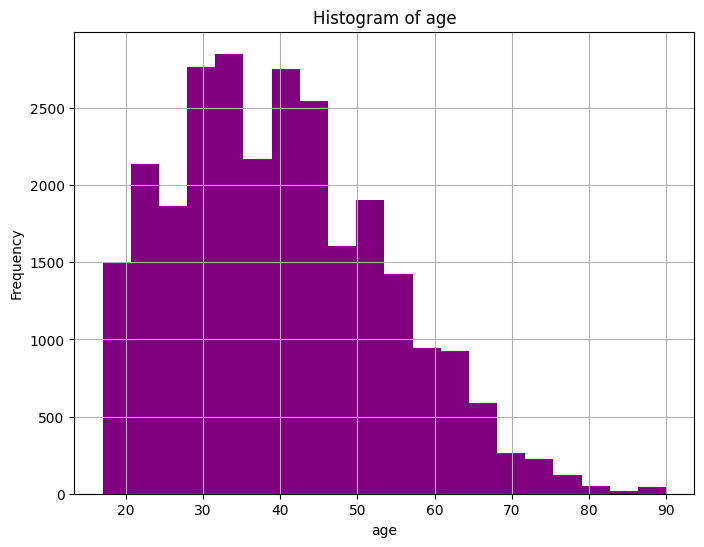

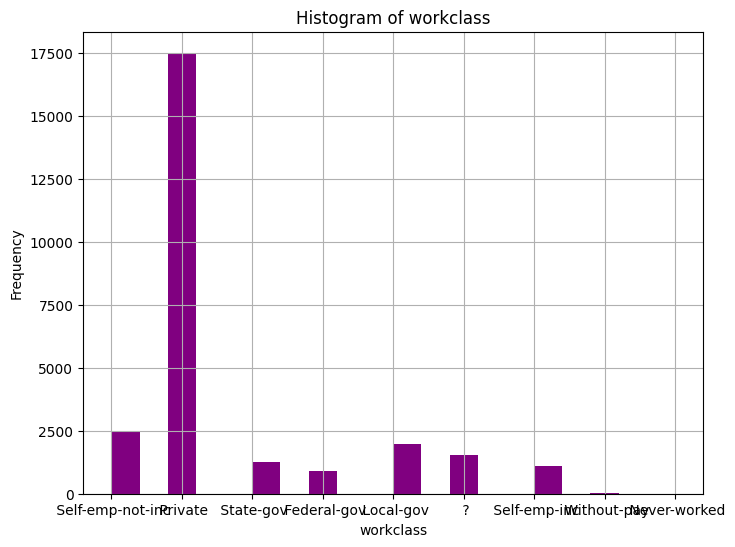

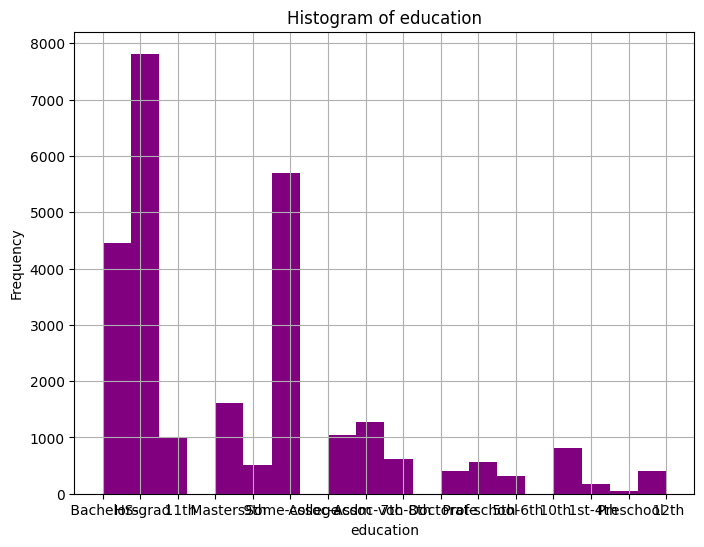

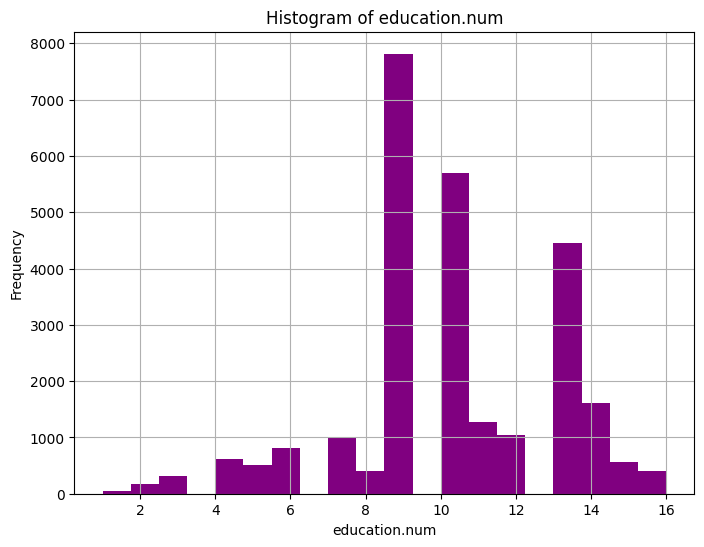

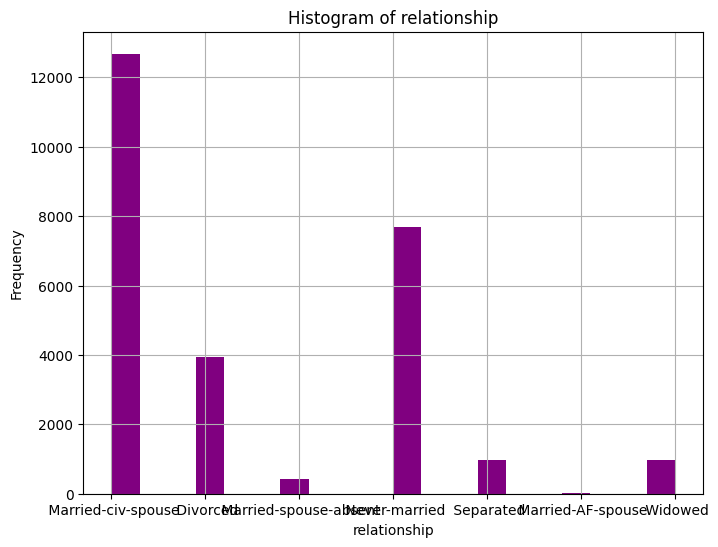

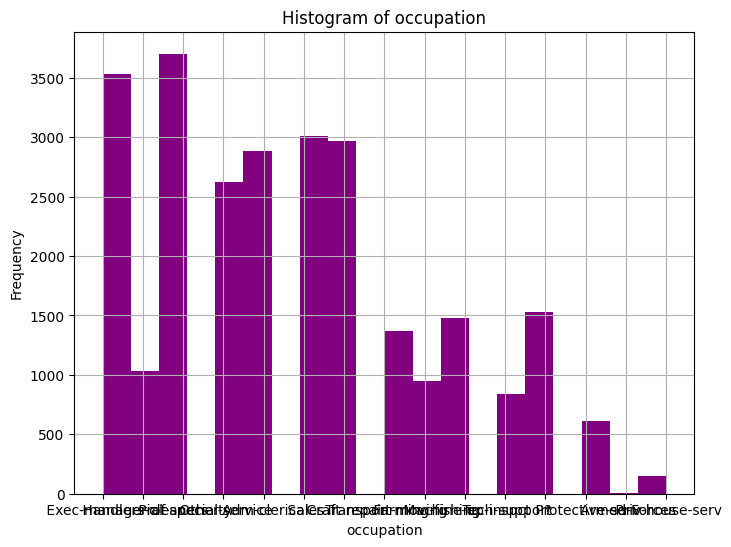

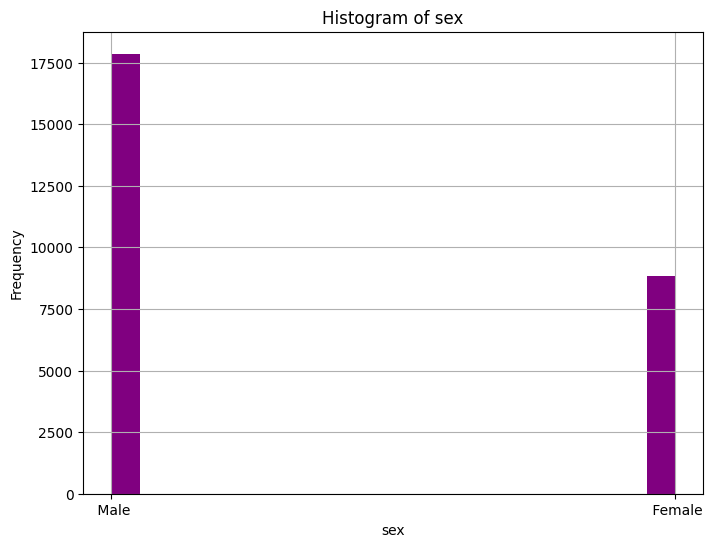

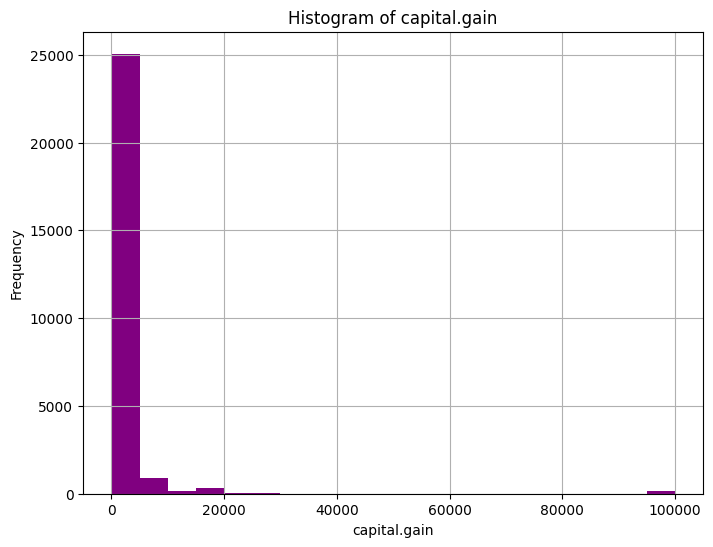

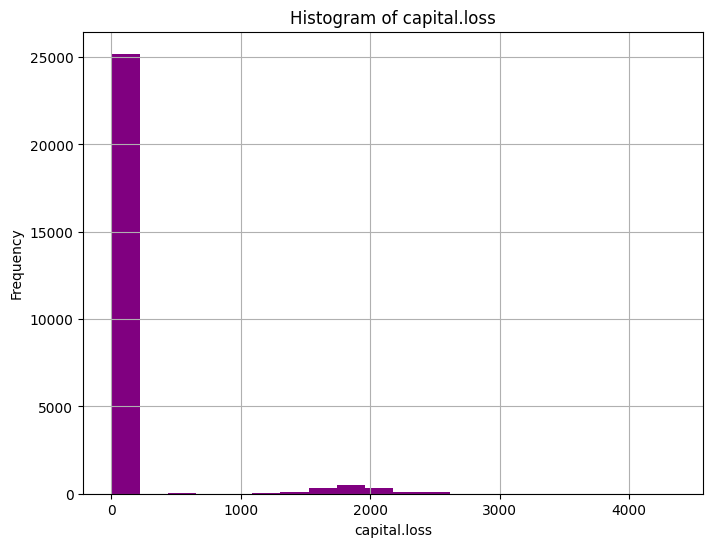

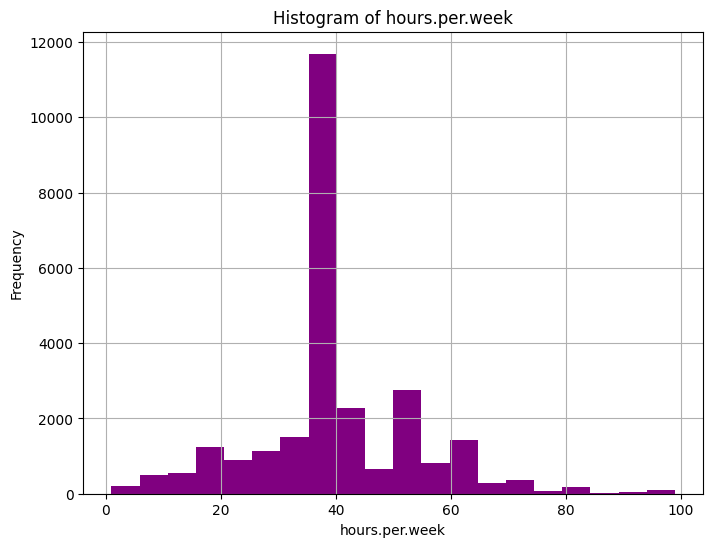

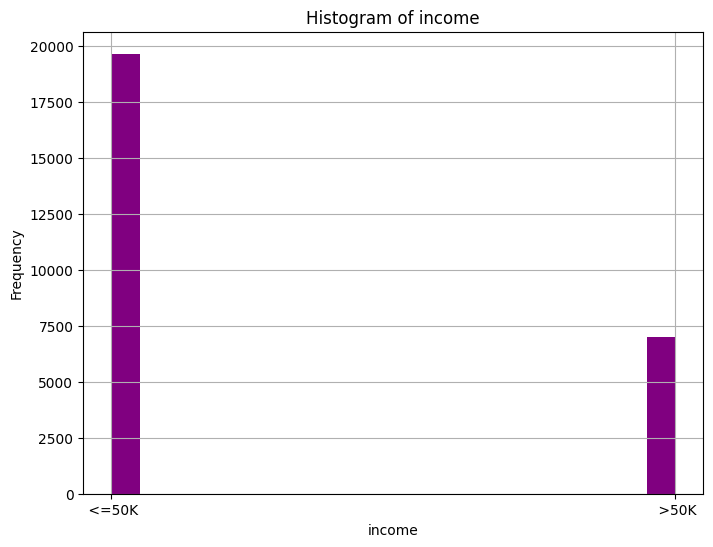

In [ ]:
import matplotlib.pyplot as plt

# Tüm değişkenler için histogram grafiklerini oluşturma
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='purple')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


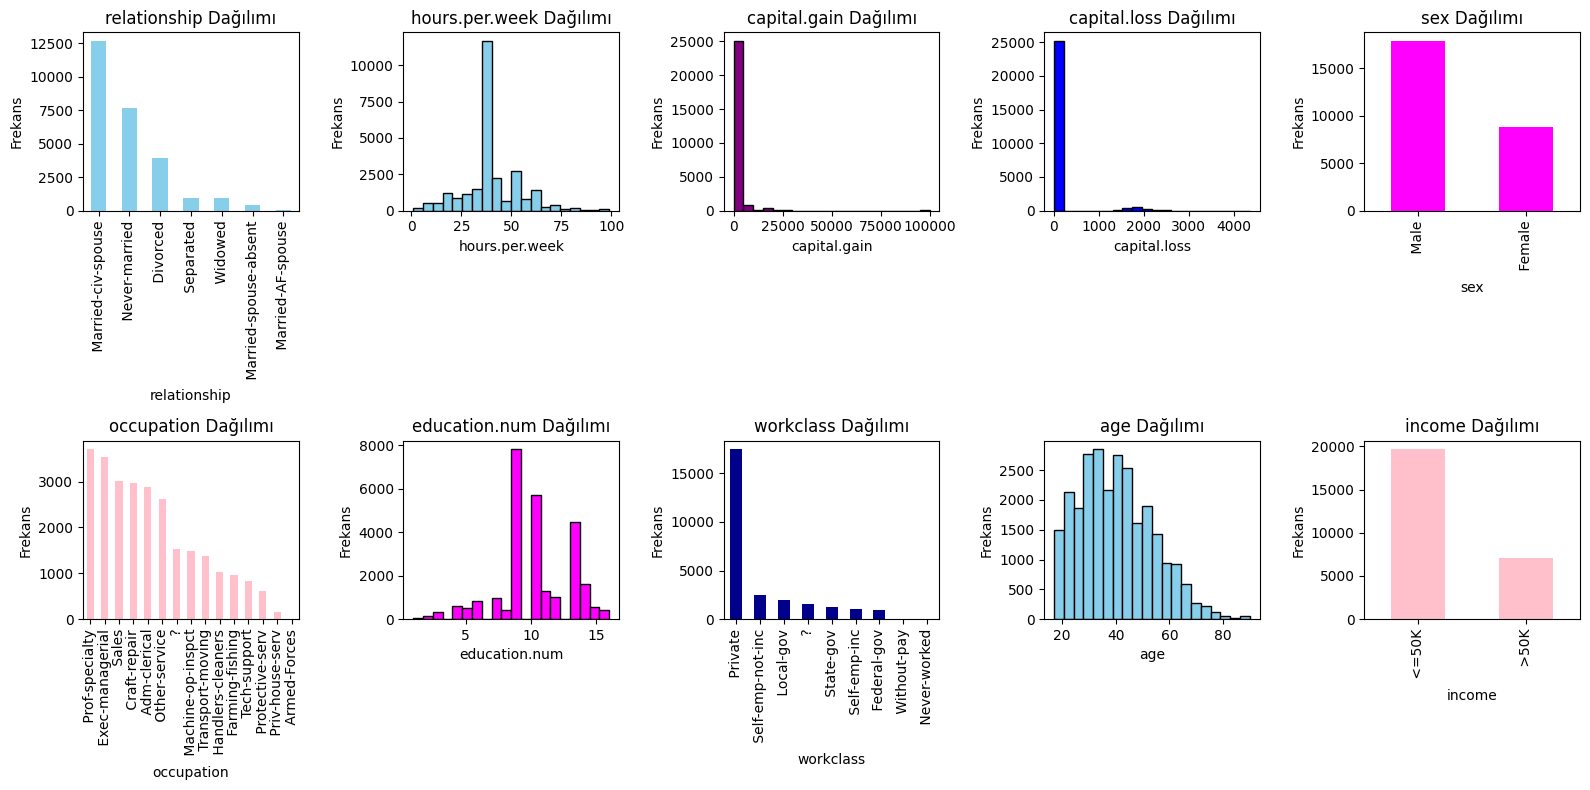

In [ ]:
# Rastgele seçilecek sütunların listesi
sampled_columns = np.random.choice(df.columns, size=10, replace=False)

# Kullanılacak renklerin listesi
colors = ['blue', 'pink', 'darkblue', 'magenta', 'purple','skyblue']

# Seçilen sütunlar için histogram veya sütun grafikleri oluşturun
plt.figure(figsize=(16, 8))
for i, column in enumerate(sampled_columns, 1):
    plt.subplot(2, 5, i)
    color = np.random.choice(colors)  # Rastgele renk seçimi
    if df[column].dtype == 'object':
        # Kategorik sütunlarsa sütun grafiği oluşturun
        df[column].value_counts().plot(kind='bar', color=color)
    else:
        # Sayısal sütunlarsa histogram oluşturun
        plt.hist(df[column], bins=20, color=color, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.title(f'{column} Dağılımı')

plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['age', 'workclass', 'education', 'education.num', 'relationship',
       'occupation', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'income'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

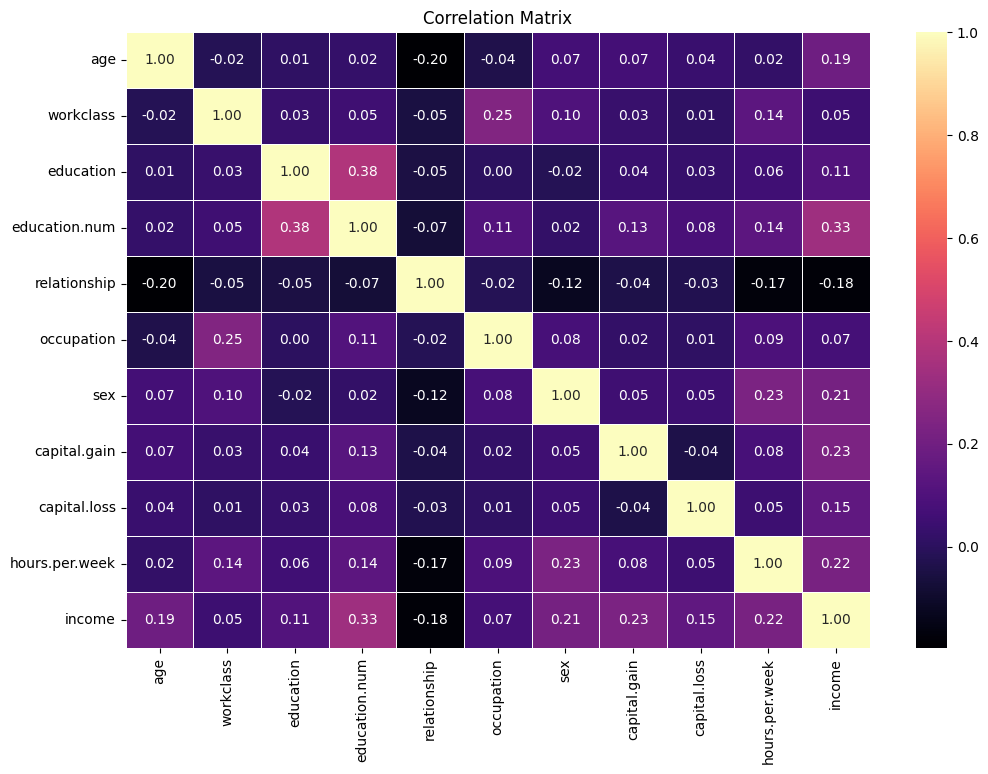

In [ ]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

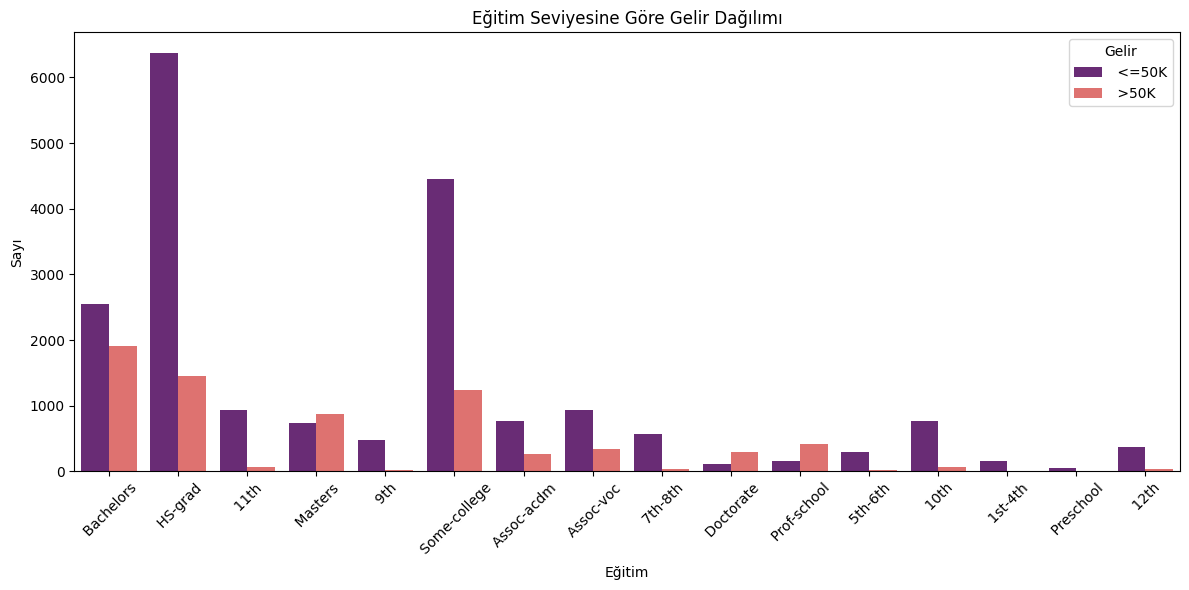

In [ ]:
plt.figure(figsize=(12, 6))

# Eğitim seviyesine göre gelir dağılımını gösteren çubuk grafik oluşturma
sns.countplot(x='education', hue='income', data=df, palette='magma')

plt.xlabel('Eğitim')
plt.ylabel('Sayı')
plt.title('Eğitim Seviyesine Göre Gelir Dağılımı')

plt.xticks(rotation=45)  # x etiketlerini 45 derece döndürme

plt.legend(title='Gelir', loc='upper right')
plt.tight_layout()

plt.show()



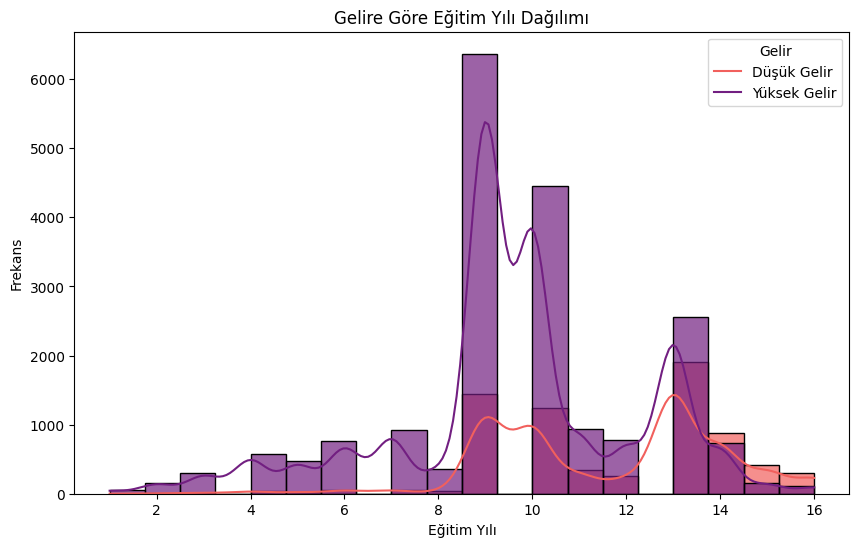

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='education.num', hue='income', bins=20, kde=True, palette='magma', alpha=0.7)
plt.xlabel('Eğitim Yılı')
plt.ylabel('Frekans')
plt.title('Gelire Göre Eğitim Yılı Dağılımı')
plt.legend(title='Gelir', labels=['Düşük Gelir', 'Yüksek Gelir'])

plt.show()

<Axes: xlabel='income', ylabel='count'>

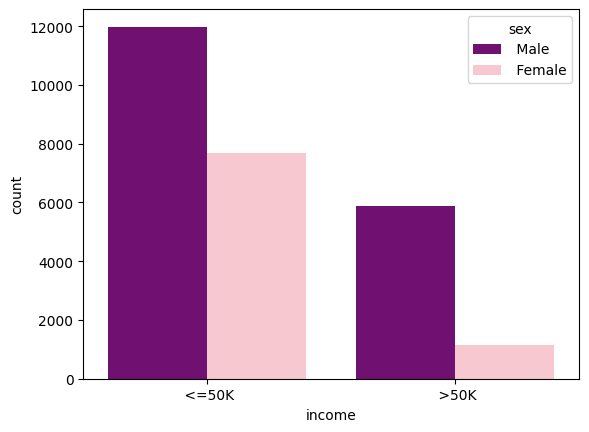

In [ ]:
import seaborn as sns

sns.countplot(x='income', hue='sex', data=df, palette=['purple', 'pink'])


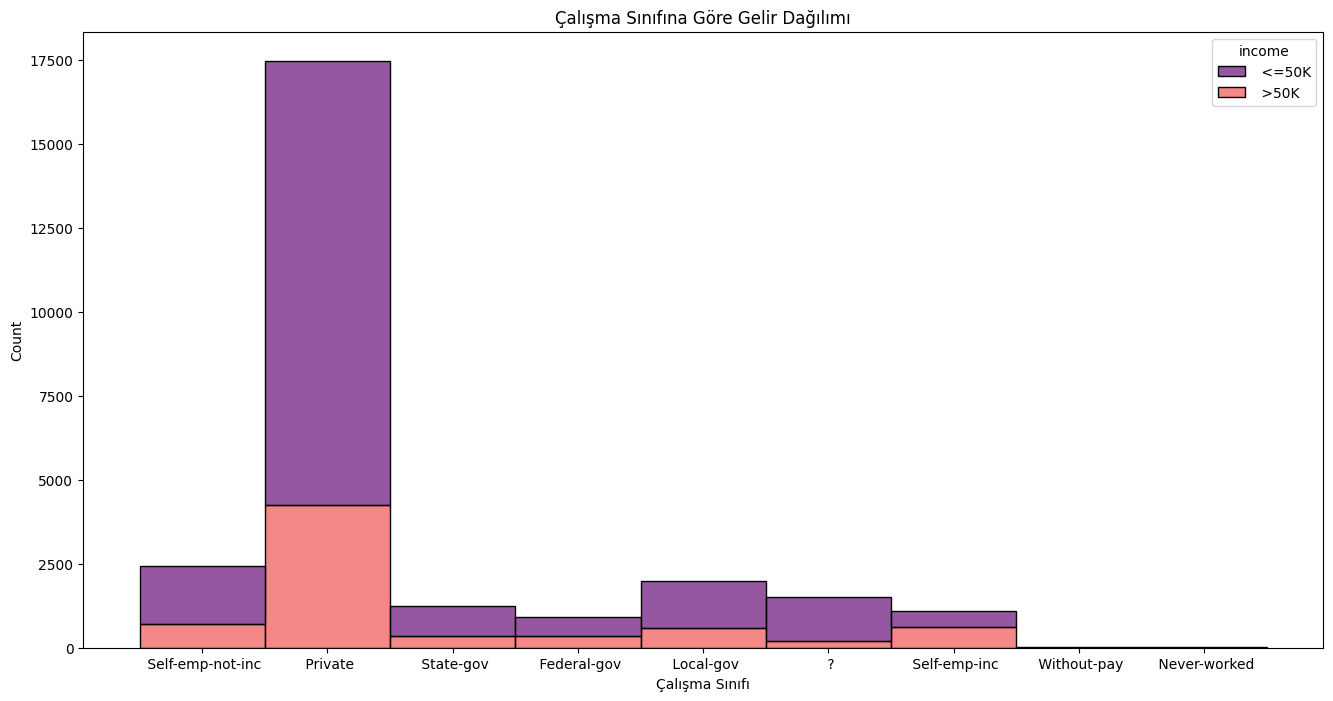

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='workclass', hue='income', multiple='stack', palette='magma')

plt.xlabel('Çalışma Sınıfı')
plt.title('Çalışma Sınıfına Göre Gelir Dağılımı')

plt.show()

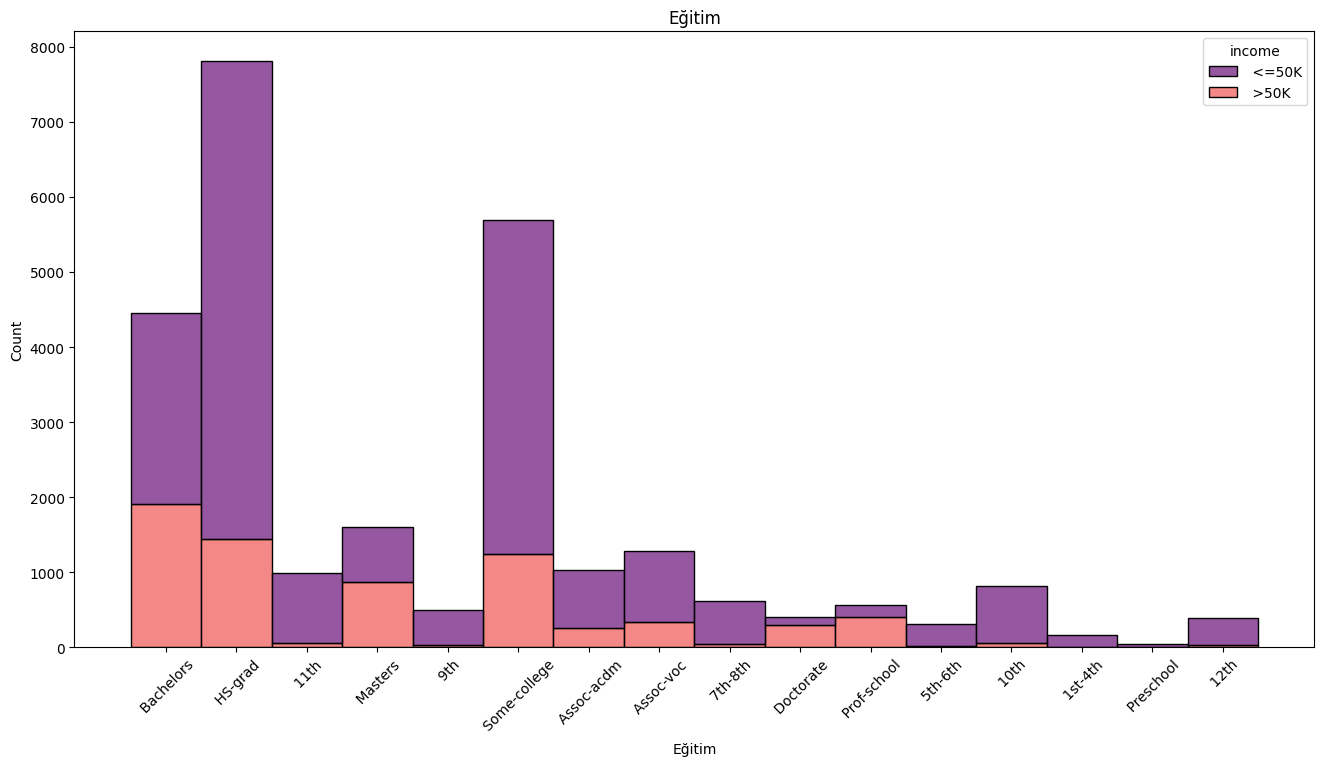

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df, x='education', hue='income', multiple='stack', palette='magma')

plt.xlabel('Eğitim')
plt.title('Eğitim')

plt.xticks(rotation=45)

plt.show()

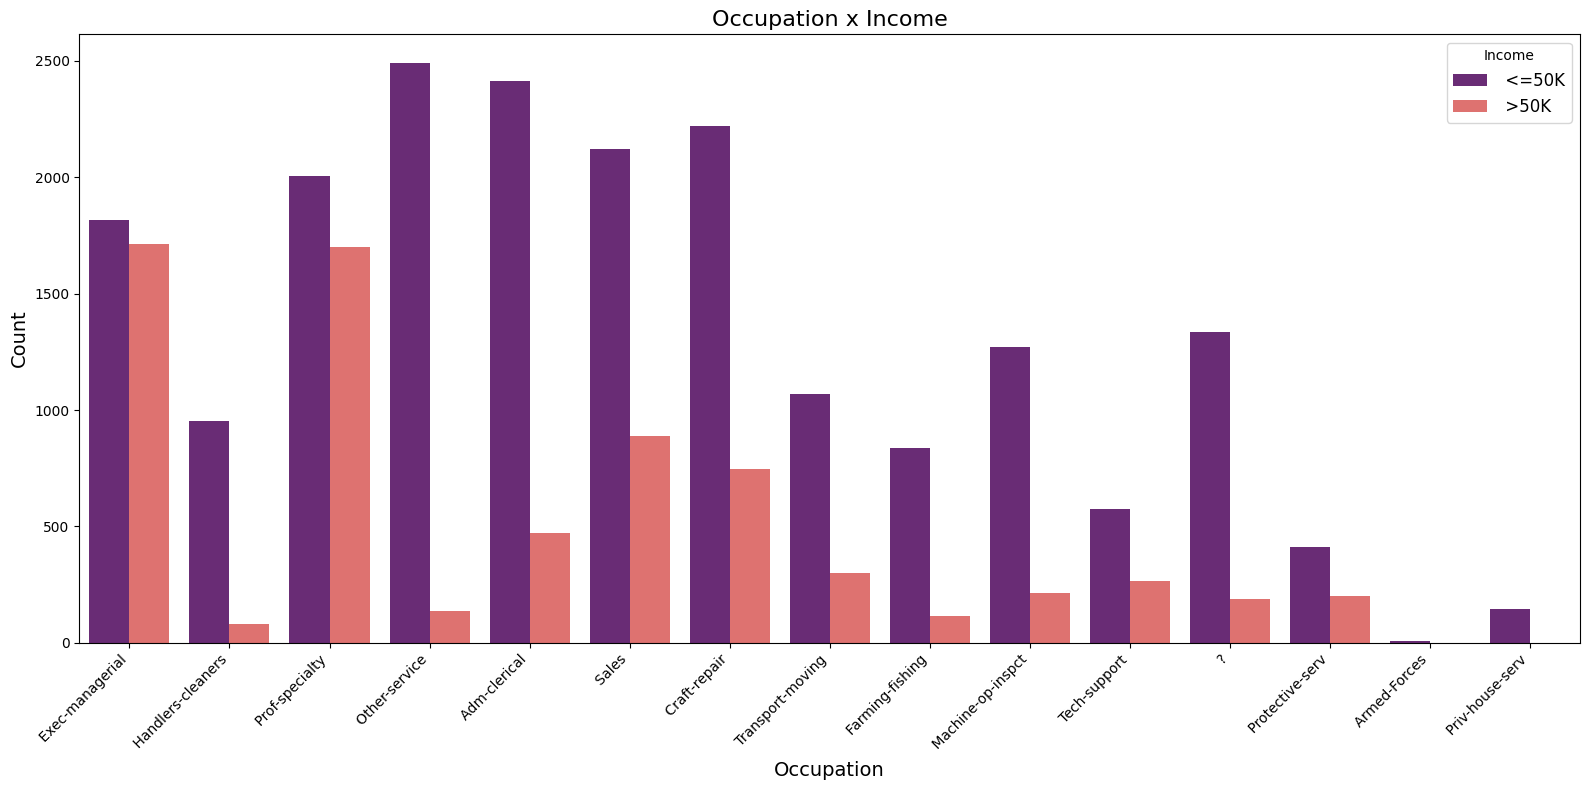

In [ ]:
plt.figure(figsize=(16, 8))

sns.countplot(data=df, x='occupation', hue='income', palette='magma')

plt.title('Occupation x Income', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')  # x etiketlerini 45 derece döndürme

plt.legend(title='Income', fontsize=12)

plt.tight_layout()  # Grafik öğelerinin birbirine girmemesi için sıkıştırma

plt.show()

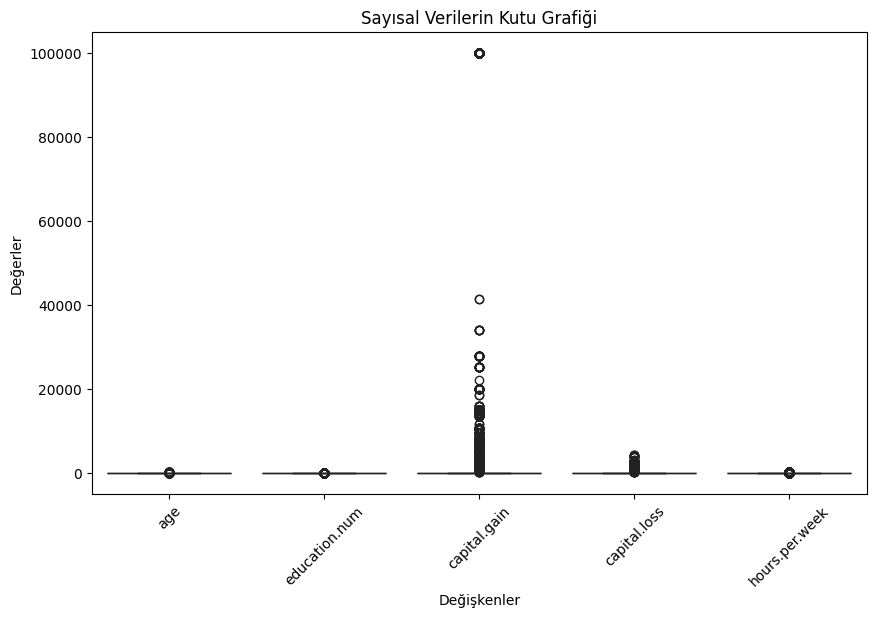

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']), palette="magma")
plt.title('Sayısal Verilerin Kutu Grafiği')
plt.xlabel('Değişkenler')
plt.ylabel('Değerler')
plt.xticks(rotation=45)
plt.show()


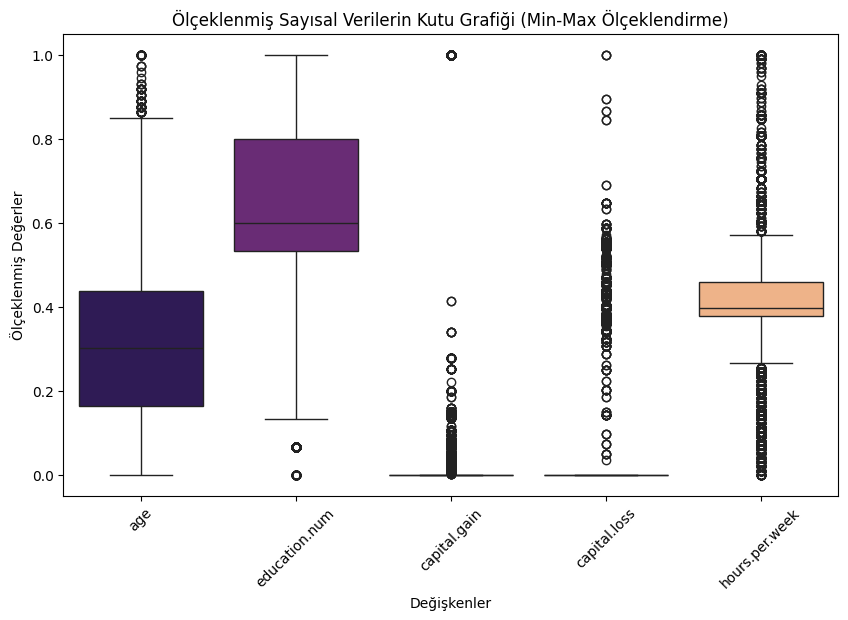

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max ölçekleyiciyi tanımlama
scaler = MinMaxScaler()

# Verileri ölçeklendirme
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))

# Ölçeklendirilmiş verileri DataFrame'e dönüştürme
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['number']).columns)

# Kutu grafiğini oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df, palette="magma")
plt.title('Ölçeklenmiş Sayısal Verilerin Kutu Grafiği (Min-Max Ölçeklendirme)')
plt.xlabel('Değişkenler')
plt.ylabel('Ölçeklenmiş Değerler')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder'ı tanımlama
label_encoder = LabelEncoder()

# Kategorik sütunları dönüştürme
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dönüşüm sonrası veri setini gözlemleme
print(df.head())


   age  workclass  education  education.num  relationship  occupation  sex  \
0   50          6          9             13             2           4    1   
1   38          4         11              9             0           6    1   
2   53          4          1              7             2           6    1   
3   28          4          9             13             2          10    0   
4   37          4         12             14             2           4    0   

   capital.gain  capital.loss  hours.per.week  income  
0             0             0              13       0  
1             0             0              40       0  
2             0             0              40       0  
3             0             0              40       0  
4             0             0              40       0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Bağımsız değişkenler ve hedef değişkeni seçin
X = df.drop('income', axis=1)  # Bağımsız değişkenler
y = df['income']  # Hedef değişken

# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlayın ve eğitin
model = RandomForestClassifier()  # Rastgele Orman sınıflandırıcısı
model.fit(X_train, y_train)

# Eğitilmiş modeli test seti üzerinde değerlendirin
y_pred = model.predict(X_test)

# Model performansını ölçün
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8209737827715355


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Doğruluk (Accuracy) ölçümü
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Kesinlik (Precision) ölçümü
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Duyarlılık (Recall) ölçümü
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Skoru ölçümü
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Karmaşıklık Matrisi (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8209737827715355
Precision: 0.6792908944399678
Recall: 0.6017130620985011
F1 Score: 0.6381529144587433
Confusion Matrix:
 [[3541  398]
 [ 558  843]]


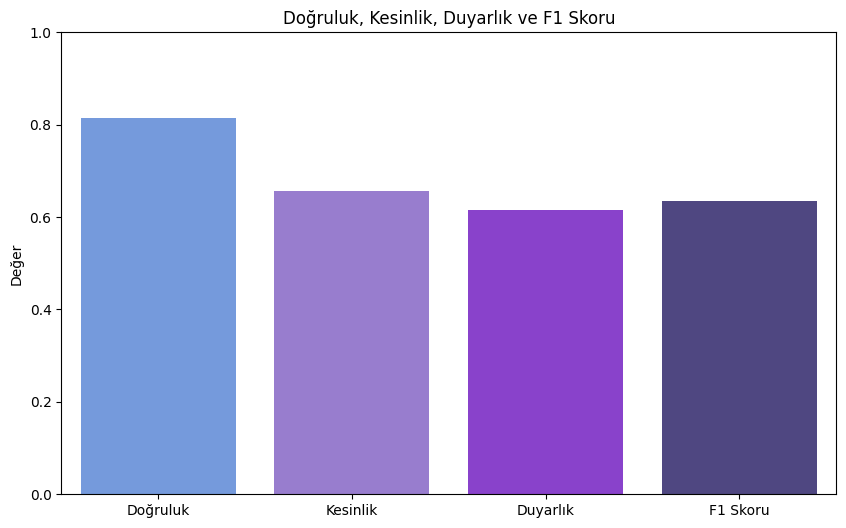

In [ ]:
import seaborn as sns

# Türkçeleştirme
dogruluk = "Doğruluk"
kesinlik = "Kesinlik"
duyarlik = "Duyarlık"
f1_skoru = "F1 Skoru"
karmasiklik_matrisi = "Karmaşıklık Matrisi"

# Görselleştirme
plt.figure(figsize=(10, 6))

# Doğruluk, Kesinlik, Duyarlık ve F1 Skoru
sns.barplot(x=[dogruluk, kesinlik, duyarlik, f1_skoru], y=[accuracy, precision, recall, f1], palette=["#6495ED", "#9370DB", "#8A2BE2", "#483D8B"])
plt.title('Doğruluk, Kesinlik, Duyarlık ve F1 Skoru')
plt.ylabel('Değer')
plt.ylim(0, 1)  # Y ekseni sınırlarını belirleme
plt.show()


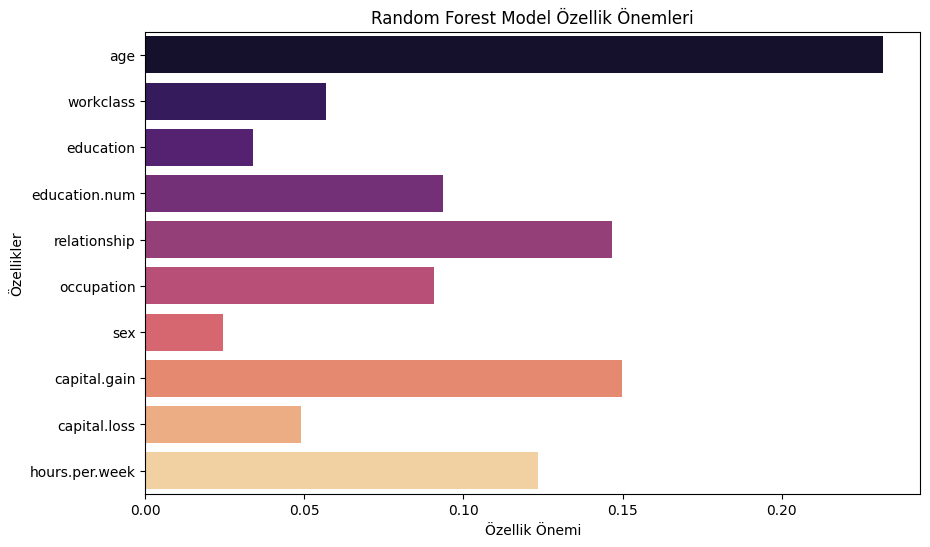

In [ ]:
# Random Forest modelinden özellik önemlerini alın
feature_importances = model.feature_importances_

# Özellik önemlerini görselleştirin
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns, palette='magma')
plt.title('Random Forest Model Özellik Önemleri')
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellikler')
plt.show()


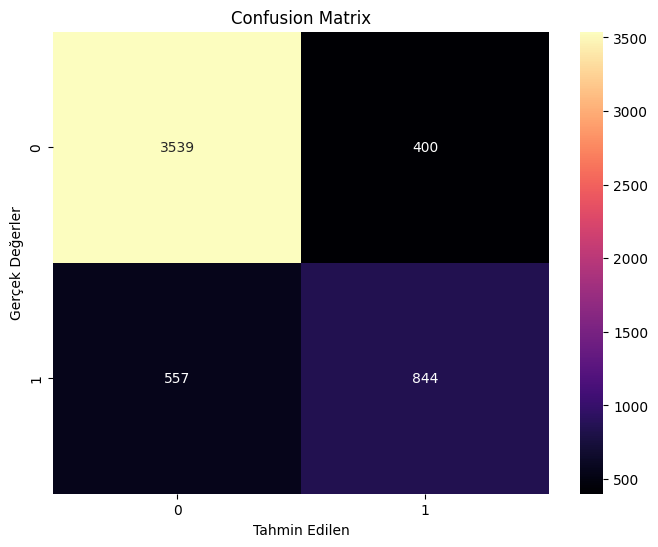

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Karmaşıklık matrisini hesapla
conf_matrix = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değerler')
plt.show()


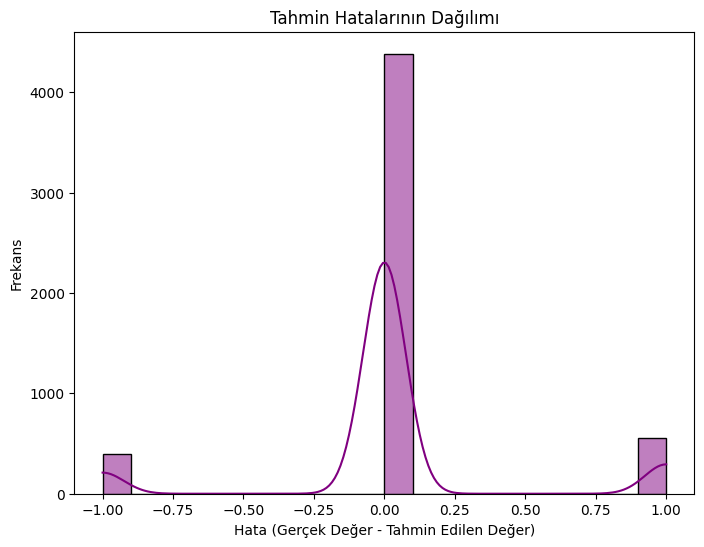

In [ ]:
# Tahmin hatalarının dağılımı
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=20)
plt.title('Tahmin Hatalarının Dağılımı')
plt.xlabel('Hata (Gerçek Değer - Tahmin Edilen Değer)')
plt.ylabel('Frekans')
plt.show()


In [ ]:
# KNN modelini tanımlayın ve eğitin
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5 seçildi
knn_model.fit(X_train, y_train)

# Eğitilmiş modeli test seti üzerinde değerlendirin
y_pred = knn_model.predict(X_test)

# Model performansını ölçün
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8142322097378277


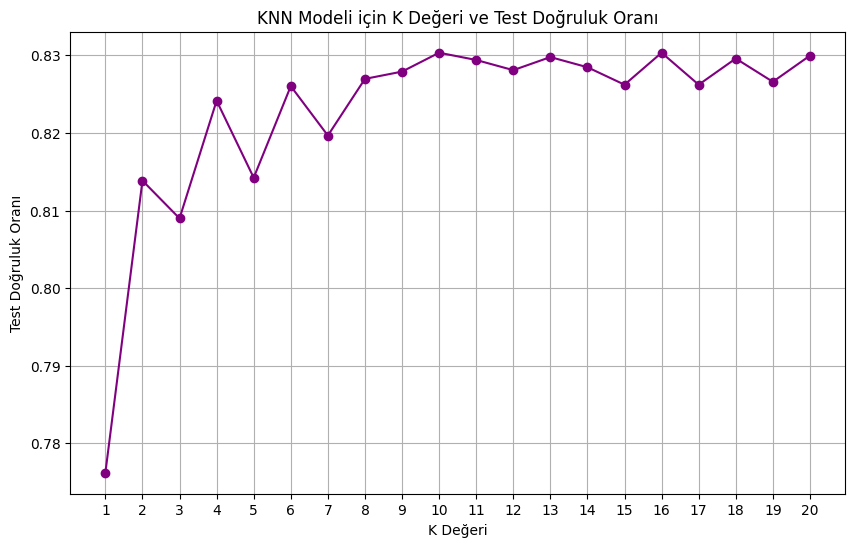

In [ ]:
# KNN modeli eğitip test eden fonksiyon
def knn_train_test(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# K değerleri ve doğruluk oranlarını depolamak için listeler oluşturma
k_values = range(1, 21)  # 1'den 20'ye kadar k değerleri
accuracies = []

# Her bir k değeri için doğruluk oranlarını hesaplama
for k in k_values:
    accuracy = knn_train_test(X_train, y_train, X_test, y_test, k)
    accuracies.append(accuracy)

# Doğruluk oranlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='purple', linestyle='-')
plt.title('KNN Modeli için K Değeri ve Test Doğruluk Oranı')
plt.xlabel('K Değeri')
plt.ylabel('Test Doğruluk Oranı')
plt.xticks(np.arange(1, 21, 1))  # x eksenindeki k değerlerini ayarlayın
plt.grid(True)
plt.show()

In [ ]:
# En iyi k değerini ve doğruluk oranını hesaplayın
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print("En iyi k değeri:", best_k)
print("En iyi test doğruluk oranı:", best_accuracy)

En iyi k değeri: 10
En iyi test doğruluk oranı: 0.8303370786516854


Test Accuracy: 0.7863295880149813
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3939
           1       0.68      0.35      0.46      1401

    accuracy                           0.79      5340
   macro avg       0.74      0.64      0.66      5340
weighted avg       0.77      0.79      0.76      5340



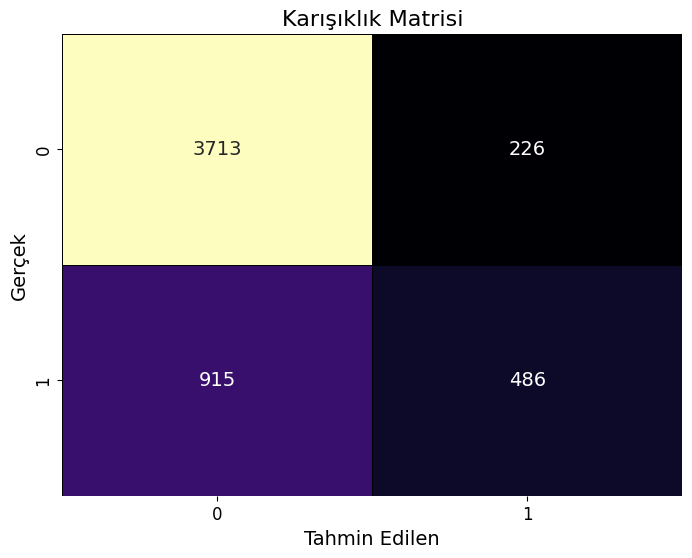

In [ ]:
# Naive Bayes modelinin tanımlanması ve eğitilmesi
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Modelin test seti üzerindeki tahminlerinin yapılması
y_pred = nb_model.predict(X_test)

# Model performansının değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', cbar=False, annot_kws={"size": 14}, linewidths=0.5, linecolor='black')
plt.title('Karışıklık Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen', fontsize=14)
plt.ylabel('Gerçek', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

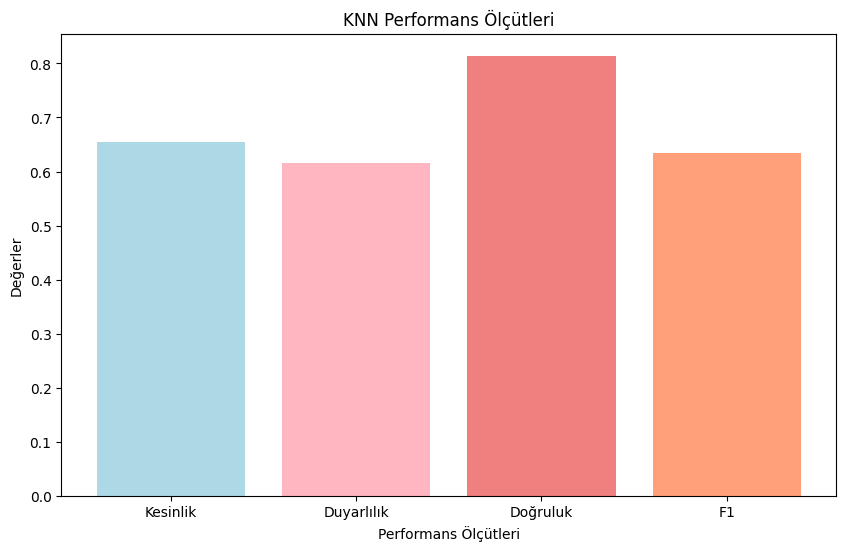

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# KNN modeli ile yapılan tahminler
y_pred = knn_model.predict(X_test)

# Performans ölçütlerinin hesaplanması
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Değerlerin listeye eklenmesi
performans = [precision, recall, accuracy, f1]
performans_isimleri = ['Kesinlik', 'Duyarlılık', 'Doğruluk', 'F1']

# Pastel renklerin tanımlanması
colors = ['lightblue', 'lightpink', 'lightcoral', 'lightsalmon']

# Performans ölçütlerinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.bar(performans_isimleri, performans, color=colors)
plt.title('KNN Performans Ölçütleri')
plt.xlabel('Performans Ölçütleri')
plt.ylabel('Değerler')
plt.show()


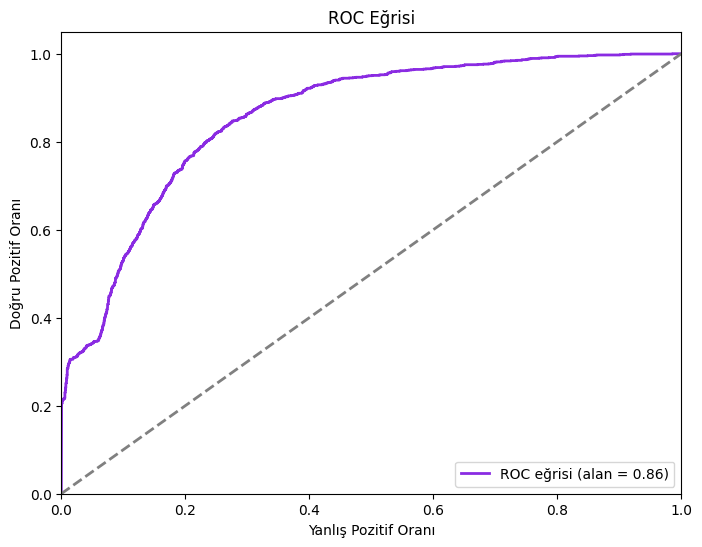

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes modelinin tanımlanması ve eğitilmesi
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Eğitim ve test seti üzerindeki tahminlerin yapılması
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Eğitim ve test doğruluk oranlarının hesaplanması
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Doğruluk oranlarının çubuk grafik ile görselleştirilmesi
accuracy_data = {'Dataset': ['Eğitim', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}
accuracy_df = pd.DataFrame(data=accuracy_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Accuracy', data=accuracy_df, palette=['#FF69B4', '#8A2BE2'])
plt.title('Eğitim ve Test Doğruluk Oranları')
plt.xlabel('Veri Seti')
plt.ylabel('Doğruluk Oranı')
plt.ylim(0, 1)
plt.show()


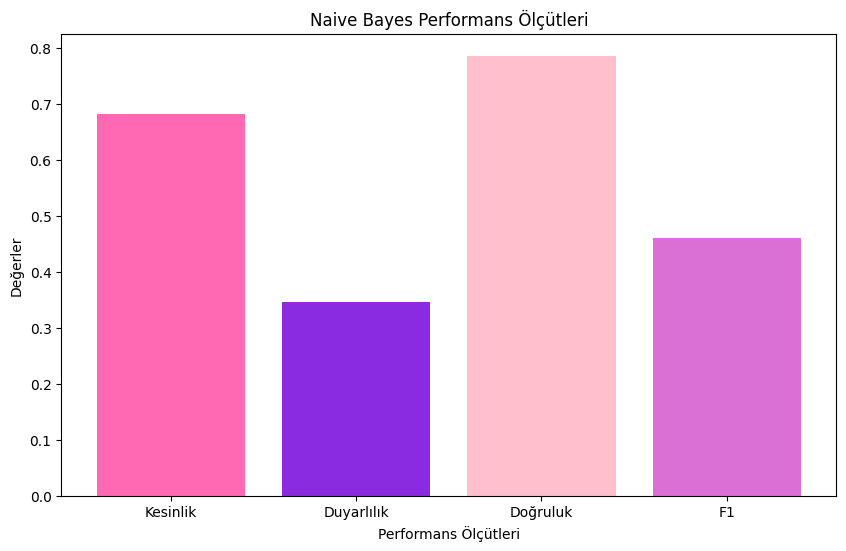

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Naive Bayes modeli ile yapılan tahminler
y_pred_nb = nb_model.predict(X_test)

# Performans ölçütlerinin hesaplanması
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Değerlerin listeye eklenmesi
performans_nb = [precision_nb, recall_nb, accuracy_nb, f1_nb]
performans_isimleri = ['Kesinlik', 'Duyarlılık', 'Doğruluk', 'F1']

# Pembe ve mor renk paletinin tanımlanması
colors = ['#FF69B4', '#8A2BE2', '#FFC0CB', '#DA70D6']

# Performans ölçütlerinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.bar(performans_isimleri, performans_nb, color=colors)
plt.title('Naive Bayes Performans Ölçütleri')
plt.xlabel('Performans Ölçütleri')
plt.ylabel('Değerler')
plt.show()


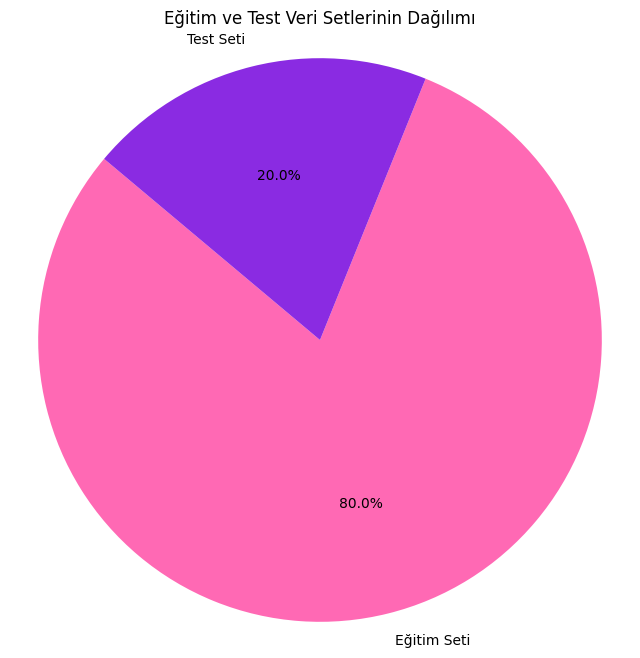

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve test veri setlerinin boyutlarını hesaplama
train_size = len(X_train)
test_size = len(X_test)

# Eğitim ve test veri setlerinin oranlarını içeren veri
sizes = [train_size, test_size]
labels = ['Eğitim Seti', 'Test Seti']
colors = ['#FF69B4', '#8A2BE2']  # Pembe ve Mor renkler

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Eğitim ve Test Veri Setlerinin Dağılımı')
plt.axis('equal')  # Eşit eksenler
plt.show()


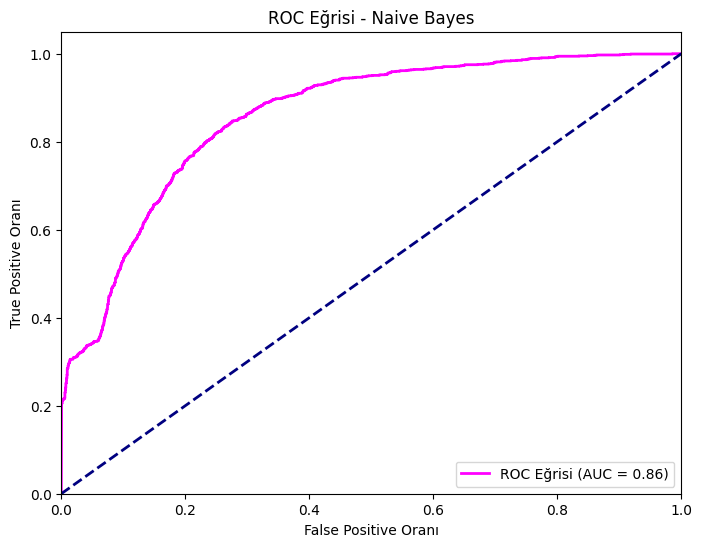

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Naive Bayes modelini tanımlayın ve eğitin
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin olasılıklarını alın
y_prob = nb_model.predict_proba(X_test)[:, 1]

# ROC eğrisi ve AUC değerini hesaplayın
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='magenta', lw=2, label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi - Naive Bayes')
plt.legend(loc="lower right")
plt.show()